<a href="https://colab.research.google.com/github/battleship0000/battleship0000-samatrix.-Ritik-bhandari.-2301201151.-sec.-B.ipynb/blob/main/samatrix_Ritik_bhandari_2301201151_sec_B_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Explain the role of weights in a neuron.
# Ans.
 In a neural network weights determine the importance of an input.

Think of a neuron like a decision-making filter:
**The Inputs (x)**: The information coming in.
**The Weights (w)**: How much you trust or value that specific information.
**The Calculation**: Input X times = Weight = Influence.

**The Rule of Thumb:**

**High Weight**: This input is very important to the final result.

**Low/Zero Weight**: This input is ignored or has no impact.

**Negative Weight**: This input discourages the final result (it acts as a "penalty").

**During Training:**

"Learning" is simply the process of automatically adjusting these weights until the model consistently makes the right prediction.

# 2. What is an activation function.
# Ans.
 An activation function is a mathematical "gatekeeper" that decides whether a neuron should "fire" (pass a signal) or not.

**Its 3 Main Roles:**

**Decision Maker**: It takes the weighted sum of inputs and converts it into an output (usually between 0 and 1, or -1 and 1).

**Non-Linearity**: This is the most important part. Without it, a neural network is just a simple linear regression. It allows the model to learn complex patterns like faces, voices, or human language.
+1

**Normalization**: It keeps the output values within a manageable range so the numbers don't explode toward infinity during calculations.

**Common Examples:**

ReLU (Most Popular): If the input is positive, pass it through; if negative, keep it at zero.

Sigmoid: Squashes any value into a range between 0 and 1 (great for probability).

Softmax: Used at the very end of a model to determine which category is the most likely winner.

# 3. Define probability distribution in ML context.

# Ans.
A probability distribution is a mathematical function that describes the likelihood of all possible outcomes for a variable.

In Machine Learning, it tells the model how "certain" it should be about a prediction.

**Key Roles in ML**:

Output Layer: In classification, the model outputs a distribution (e.g., 90% chance "Cat," 10% chance "Dog").

Data Modeling: We assume input data follows a specific pattern (like a Gaussian/Normal Distribution) to help the model learn more efficiently.

Uncertainty: It helps the model quantify what it doesn't know.

**Most Common Types:**

Bernoulli: For binary (Yes/No) outcomes, like spam detection.

Multinoulli: For multiple categories, like recognizing handwritten digits (0–9).

Gaussian (Normal): The "Bell Curve" used for continuous data like heights or house prices.

# 4. What is gradient in optimization?

# Ans.
A gradient is the "slope" or "steepness" of a function at a specific point. It tells an optimization algorithm (like Gradient Descent) which way is "uphill" and how fast it’s rising.

**Its 2 Vital Roles:**

**Direction**:

 The gradient points toward the direction of the steepest increase. To minimize error (the goal of ML), we move in the opposite direction.

**Magnitude:**

A larger gradient means the slope is very steep (we are far from the goal); a tiny gradient means we are nearing the bottom (the "minimum").

**The Optimization Logic:**


**Calculate Gradient:** Find the slope of the error.

**Update Weights:** Nudge the weights "downhill" (negative gradient).

**Repeat**: Stop once the gradient is near zero, meaning you've reached the lowest possible error.

Epoch 50, Loss: 0.4441
Epoch 100, Loss: 0.3815
Epoch 150, Loss: 0.3369
Epoch 200, Loss: 0.3039

Probability of passing with 3.5 hours: 0.6073105931282043


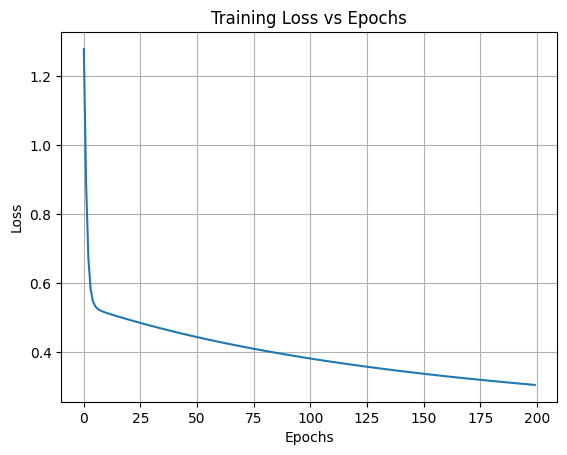

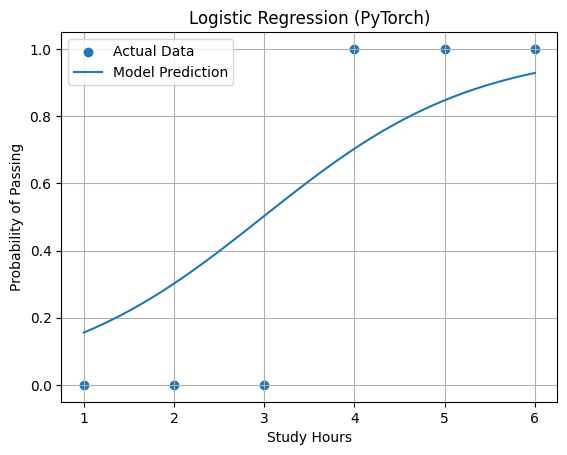

In [ ]:
# Logistic Regression using PyTorch (Tensors) with Graph

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare Data

X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0]])
y = torch.tensor([[0.0], [0.0], [0.0], [1.0], [1.0], [1.0]])

# 2. Define Model

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegression()

# 3. Loss & Optimizer

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 4. Training

epochs = 200
losses = []

for epoch in range(epochs):

    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# 5. Testing

test_input = torch.tensor([[3.5]])
prediction = model(test_input)

print("\nProbability of passing with 3.5 hours:", prediction.item())

# 6. Plot Training Loss

plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.grid(True)
plt.show()

# 7. Plot Logistic Regression Curve

# Generate continuous values
X_plot = torch.linspace(1, 6, 100).reshape(-1, 1)

with torch.no_grad():
    y_plot = model(X_plot)

# Convert to numpy
X_plot = X_plot.numpy()
y_plot = y_plot.numpy()

# Original data
X_data = X.numpy()
y_data = y.numpy()

plt.figure()

# Scatter original data
plt.scatter(X_data, y_data, label="Actual Data")

# Plot model prediction
plt.plot(X_plot, y_plot, label="Model Prediction")

plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression (PyTorch)")
plt.legend()
plt.grid(True)
plt.show()
